## Projeto Rooney - Netflix

In [122]:
!pip install joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.subplots as sp
import os
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from joblib import dump, load

data = pd.read_csv(r'netflix_titles.csv')

## Contexto do Negócio e Necessidade da Solução, com ênfase em Marketing:
###### A Netflix, como uma das principais plataformas de streaming do mundo, reconhece a importância do marketing como um componente crítico para seu sucesso contínuo. Com uma extensa biblioteca de conteúdo e uma base global de mais de 200 milhões de assinantes, o marketing desempenha um papel central na estratégia de negócios da Netflix.

###### Descrição de cada coluna no conjunto de dados:

* show_id: Um identificador único para cada programa ou filme.

* type: O tipo de conteúdo, seja "Filme" ou "Série de TV."

* title: O título do filme ou programa de TV.

* director: O diretor do filme ou programa de TV. Nas primeira e terceira entradas, essa informação não está disponível (NaN).

* cast: O elenco ou atores no filme ou programa de TV. Na primeira entrada, essa informação não está disponível (NaN). Na segunda entrada, há uma lista de atores da série de TV "Blood & Water".

* country: O país onde o filme ou programa de TV foi produzido ou está associado.

* date_added: A data em que o conteúdo foi adicionado à plataforma de streaming, no formato "Mês Dia, Ano."

* release_year: O ano em que o filme ou programa de TV foi originalmente lançado.

* rating: A classificação do conteúdo, que indica a idade recomendada da audiência ou nível de maturidade (por exemplo, "PG-13" ou "TV-MA").

* duration: A duração do filme ou programa de TV. Na primeira entrada, a duração é dada em minutos ("90 min"). Nas segunda e terceira entradas, é indicada o número de temporadas ("2 Temporadas" e "1 Temporada").

* listed_in: O gênero ou categoria do conteúdo, que pode ajudar a classificá-lo (por exemplo, "Documentários," "Programas de TV Internacionais," "Programas de TV de Crime").

* description: Uma breve descrição ou sinopse do filme ou programa de TV, fornecendo uma visão geral da trama ou do assunto.

In [123]:
data.head(5) # Visualizando as 5 primeiras linhas do dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [124]:
data.shape #Tamanho do nosso dataset

(8807, 12)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


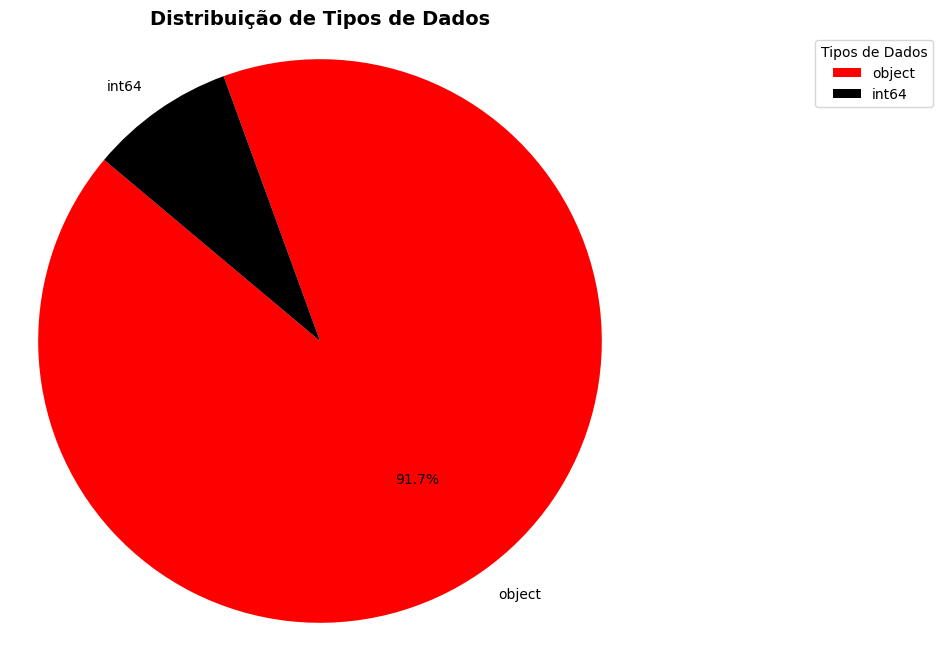

In [126]:
import matplotlib.pyplot as plt

# Cores personalizadas para as fatias do gráfico de pizza
cores = ['red', 'black']

# Contagens de tipos de dados
data_types_counts = data.dtypes.astype(str).value_counts()

# Crie um gráfico de pizza com as cores desejadas
plt.figure(figsize=(8, 8))
plt.pie(data_types_counts, labels=data_types_counts.index, autopct='%1.1f%%', colors=cores, startangle=140)
plt.title('Distribuição de Tipos de Dados', fontsize=14, fontweight='bold')
plt.axis('equal')  # Para manter uma aparência circular
plt.legend(title='Tipos de Dados', labels=data_types_counts.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [127]:
data.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [128]:
# Avaliando a integridade dos dados para identificar quais colunas possuem uma porcentagem significativa de valores nulos.
null_counts = data.isnull().sum()
total_rows = len(data)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

     Column Name  Null Percentage
0       director        29.908028
1        country         9.435676
2           cast         9.367549
3     date_added         0.113546
4         rating         0.045418
5       duration         0.034064
6        show_id         0.000000
7           type         0.000000
8          title         0.000000
9   release_year         0.000000
10     listed_in         0.000000
11   description         0.000000


* Nosso dataset está com uma alta porcentagem de dados ausentes nas colunas "director", "country" e "cast". Isso pode impactar nossa análise que dependem dessas informações.

In [129]:
# preenchendo os valores ausentes nas colunas especificadas com a string "Unknown"  para indicar que a informação está faltando.

columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    data[column].fillna("Unknown", inplace=True)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [130]:
# a coluna "type" é diversificada, indicando a presença de diferentes tipos de conteúdo, como filmes e Séries
data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

### Comparação entre Número de Filmes e Séries no Conjunto de Dados

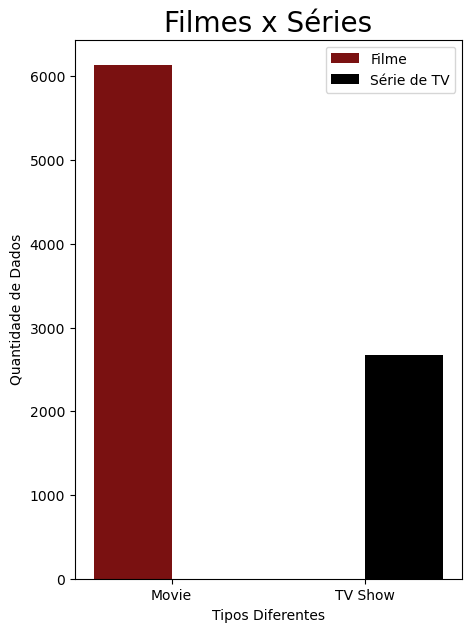

In [131]:
# Paleta de cores
colors = ["#8B0000", "#000000"]

plt.figure(figsize=(5, 7))
sns.set_palette(sns.color_palette(colors))  # Define a paleta de cores
sns.countplot(x='type', data=data, hue='type')
plt.title('Filmes x Séries', fontsize=20)
plt.xlabel('Tipos Diferentes', fontsize=10)
plt.ylabel('Quantidade de Dados', fontsize=10)
plt.legend(labels=['Filme', 'Série de TV'])
plt.show()


In [132]:
mydf_country = data['country'].value_counts().reset_index()[:15]
mydf_country = mydf_country[mydf_country['index'] != 'UnKnown']

# Criar uma lista de cores alternadas entre vermelho e preto
colors = ['red' if i % 2 == 0 else 'black' for i in range(len(mydf_country['index']))]

trace1 = go.Bar(
    x=mydf_country['index'],
    y=mydf_country['country'],
    marker=dict(color=colors, line=dict(color='rgb(0, 0, 0)', width=1.5))
)

layout = go.Layout(
    template="plotly_white",
    title='TOP PAÍSES COM O MAIOR NÚMERO DE FILMES NA NETFLIX',
    xaxis=dict(title='Países'),
    yaxis=dict(title='Contagem')
)

fig = go.Figure(data=[trace1], layout=layout)
fig.show()


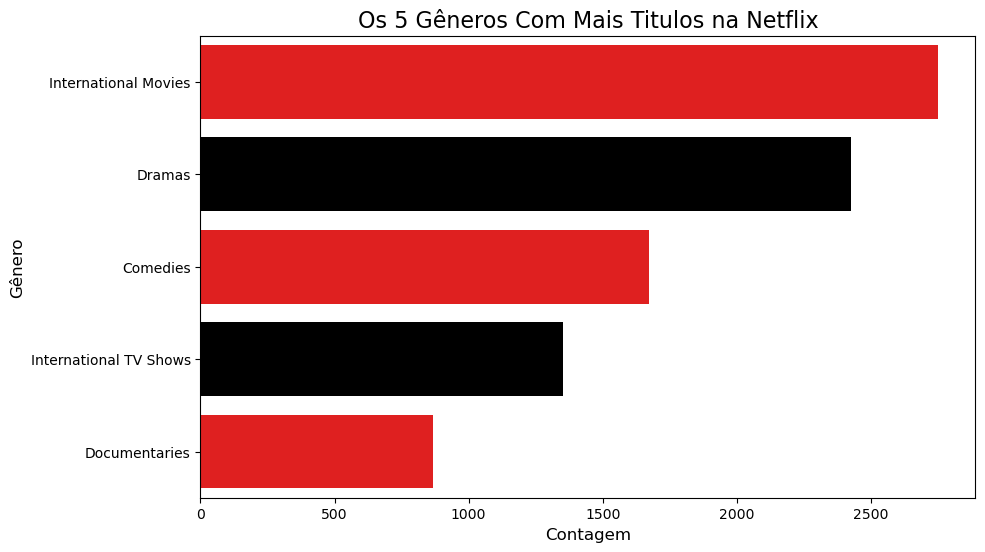

In [133]:
genre_counts = data['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)

# Crie uma lista de cores alternadas
colors = ['#FF0000', '#000000'] * (len(top_5_genres) // 2) + ['#FF0000'] * (len(top_5_genres) % 2)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_genres.values, y=top_5_genres.index, palette=colors)
plt.title("Os 5 Gêneros Com Mais Titulos na Netflix", fontsize=16)
plt.xlabel("Contagem", fontsize=12)
plt.ylabel("Gênero", fontsize=12)
plt.show()


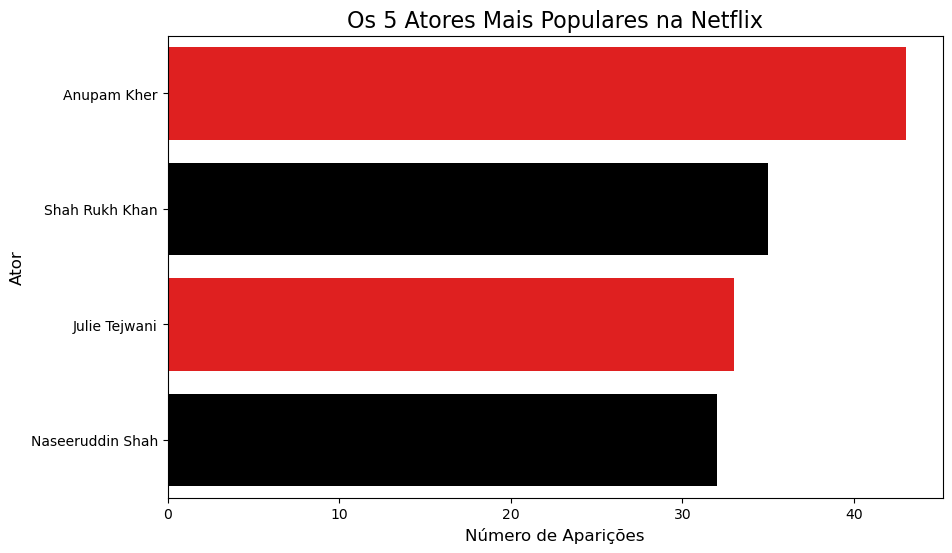

In [134]:
# Dados dos atores mais populares
top_5_cast = {
    "Anupam Kher": 43,
    "Shah Rukh Khan": 35,
    "Julie Tejwani": 33,
    "Naseeruddin Shah": 32,
}

# Lista de cores alternadas de vermelho (#FF0000) e preto (#000000)
colors = ["#FF0000", "#000000"] * (len(top_5_cast) // 2)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_5_cast.values()), y=list(top_5_cast.keys()), palette=colors)
plt.title("Os 5 Atores Mais Populares na Netflix", fontsize=16)
plt.xlabel("Número de Aparições", fontsize=12)
plt.ylabel("Ator", fontsize=12)
plt.show()


* Os 5 Atores Mais Populares

No conjunto de dados, os 5 atores mais destacados são determinados com base no número de vezes em que aparecem no conteúdo da Netflix. Os atores mais proeminentes são:

- Anupam Kher, que possui 43 aparições.
- Shah Rukh Khan, com 35 aparições.
- Julie Tejwani, registrando 33 aparições.
- Naseeruddin Shah, com um total de 32 aparições.

Esses artistas têm uma presença notável nos títulos da Netflix, sendo Anupam Kher o mais prolífico, com 43 aparições. Isso reflete o fato de que eles desempenham um papel de destaque nas ofertas da plataforma de streaming e são figuras proeminentes no mundo do entretenimento proporcionado pela Netflix.

### Análise das Categorias de Conteúdo da Netflix

Realiza uma análise das categorias de conteúdo dentro do conjunto de dados da Netflix. O objetivo é fornecer insights sobre a distribuição e popularidade de diferentes categorias de conteúdo.

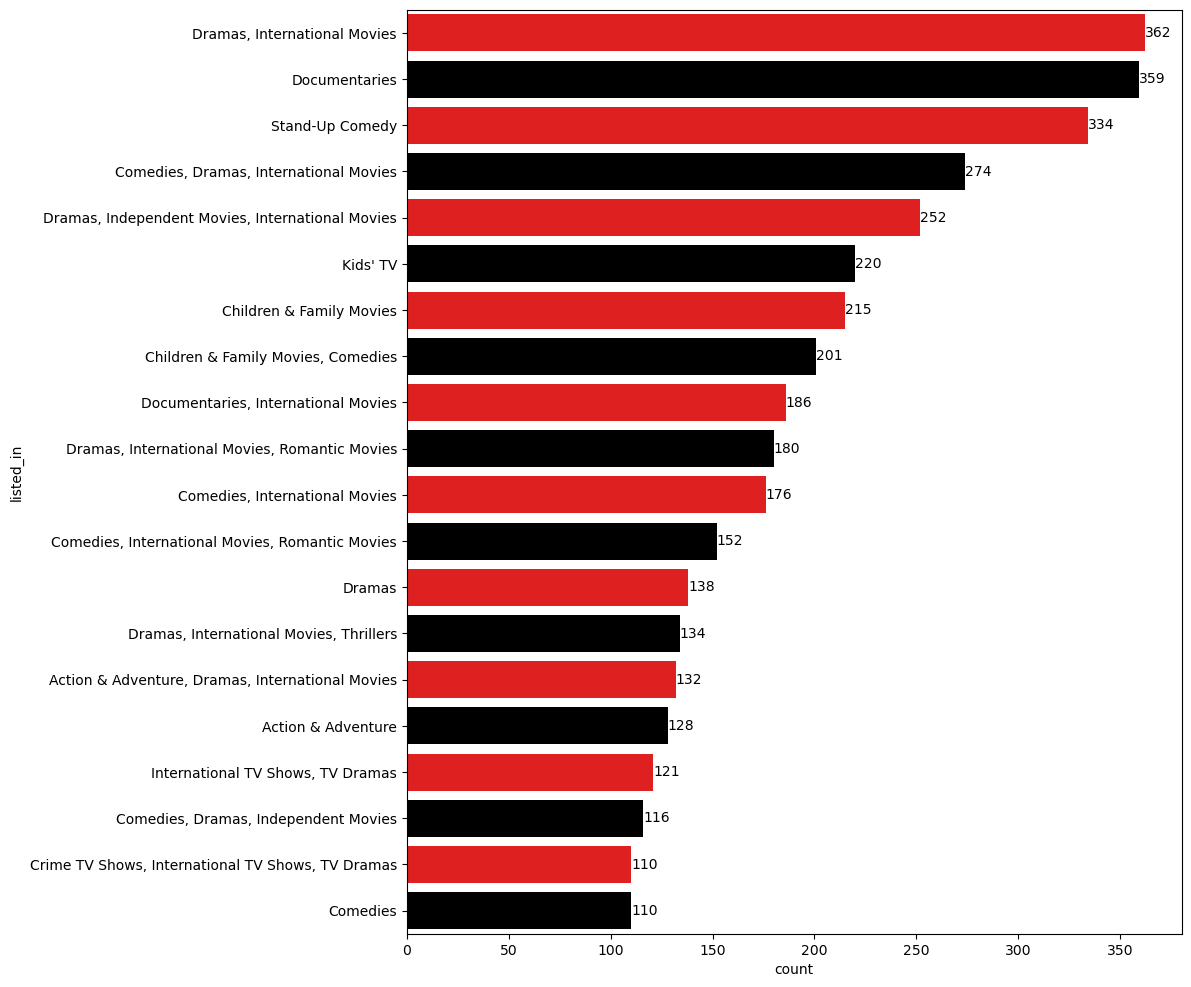

In [135]:
# Suponha que você já tenha um DataFrame chamado "data" com a coluna "listed_in".

# Defina uma paleta de cores personalizada com tons de vermelho e preto
colors = ["#FF0000", "#000000"]

plt.figure(figsize=(10, 12))
ax = sns.countplot(data=data, y="listed_in", order=data['listed_in'].value_counts().index[0:20], palette=colors)
ax.bar_label(ax.containers[0])
plt.show()


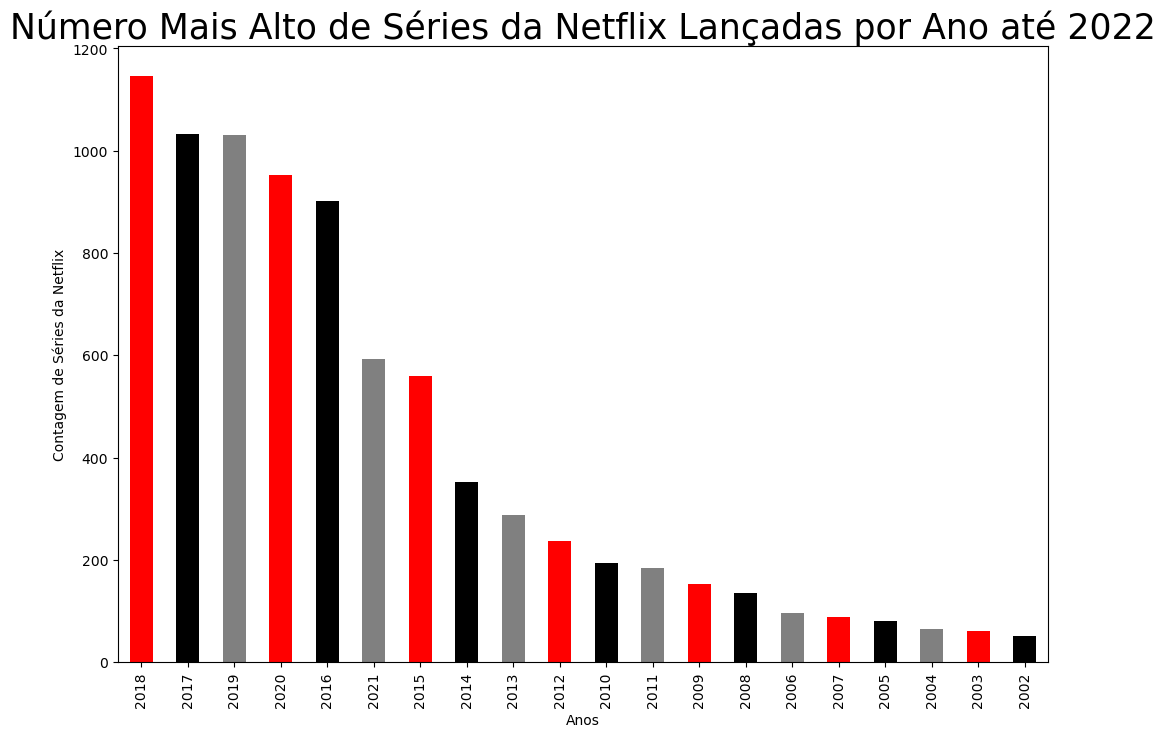

In [136]:
# Filtrar os dados para incluir apenas os lançamentos até 2022
data_filtered = data[data['release_year'] <= 2022]

# Criar o gráfico com os dados filtrados
plt.figure(figsize=(12, 8))
data_filtered['release_year'].value_counts()[:20].plot(kind="bar", color=['red', 'black', 'gray',])
plt.title('Número Mais Alto de Séries da Netflix Lançadas por Ano até 2022', fontsize=25)
plt.xlabel('Anos', fontsize=10)
plt.ylabel('Contagem de Séries da Netflix', fontsize=10)
plt.show()


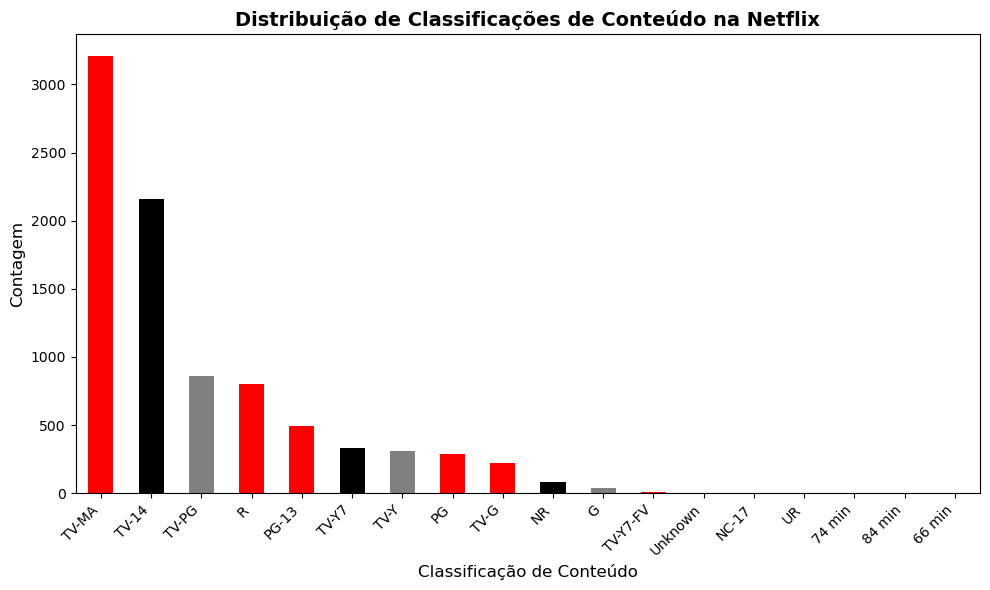

In [137]:
# Cores personalizadas para as barras do gráfico de barras
cores = ['red', 'black', 'gray', 'red']

# Crie um gráfico de barras com cores diferentes
plt.figure(figsize=(10, 6))
rating_counts = data['rating'].value_counts()
rating_counts.plot(kind='bar', color=cores)
plt.title('Distribuição de Classificações de Conteúdo na Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Classificação de Conteúdo', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos no eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para garantir que todos os elementos se encaixem bem
plt.show()


### Features

In [138]:
int_col = data.select_dtypes(include=('int')).columns
str_col = data.select_dtypes(include=('object')).columns
flt_col = data.select_dtypes(include=('float')).columns

In [139]:
#  Vamos utilizar o LabelEncoder para converter variáveis categóricas em variáveis numéricas
le = LabelEncoder()
for col in str_col:
    data[col] = le.fit_transform(data[col].astype('str'))
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,7246,603,1711,2020,7,210,274,2577
1,1111,1,1091,4303,409,426,1706,2021,11,110,414,1762
2,2222,1,2651,2105,6296,736,1706,2021,11,0,242,7341
3,3333,1,3506,4303,7246,736,1706,2021,11,0,297,3617
4,4444,1,3861,4303,4815,251,1706,2021,11,110,393,4416


In [140]:
x = data.drop(['type'], axis='columns')
y = data[['type']]

In [141]:
# dividir conjuntos de dados em conjuntos de treinamento e teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### Random Forest

Accuracy: 0.9943246
Precision: 0.9943710
Recall: 0.9943246
F1-Score: 0.9943101


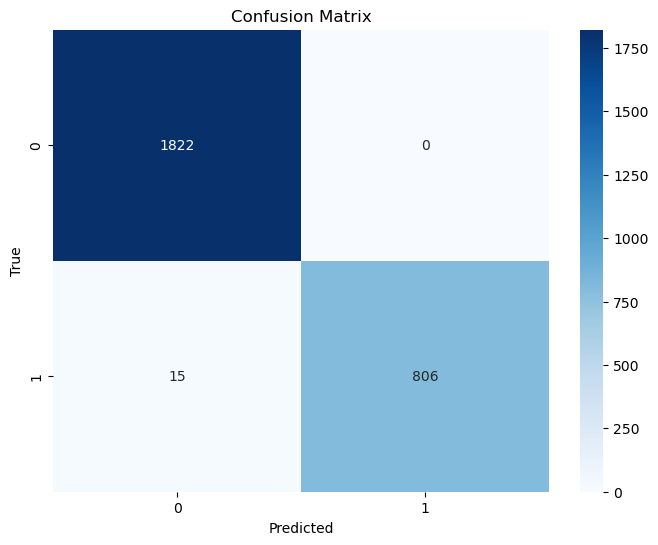

In [142]:
# Treinando o modelo de classificação Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
dump(rf, 'randomforest.joblib')
loaded_rf = load('randomforest.joblib')

predictions = loaded_rf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy:.7f}")
print(f"Precision: {precision:.7f}")
print(f"Recall: {recall:.7f}")
print(f"F1-Score: {f1:.7f}")

# Plotando a matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes

Accuracy: 0.8630344
Precision: 0.8750324
Recall: 0.8630344
F1-Score: 0.8659133


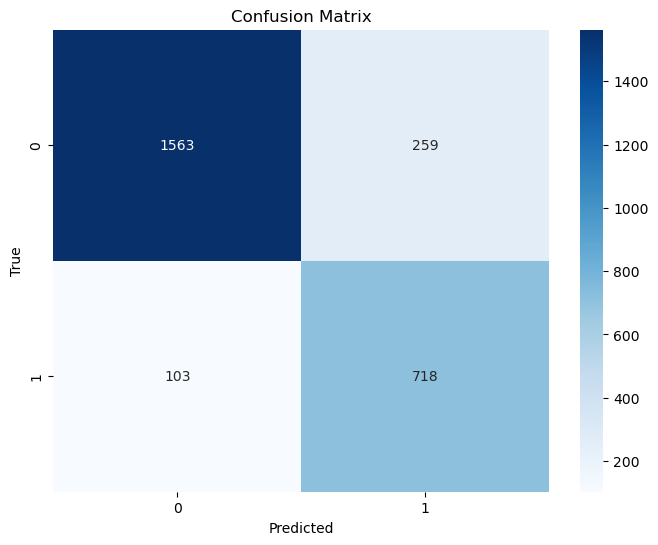

In [143]:
nb = GaussianNB()

# Treinando o modelo
nb.fit(x_train, y_train)

dump(nb, 'naivebayes.joblib')
loaded_nb = load('naivebayes.joblib')

# Fazendo previsões no conjunto de teste
predictions = loaded_nb.predict(x_test)

# Calculando métricas
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
print(f"Accuracy: {accuracy:.7f}")
print(f"Precision: {precision:.7f}")
print(f"Recall: {recall:.7f}")
print(f"F1-Score: {f1:.7f}")

# Plotando a matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machine

Accuracy: 0.8755202
Precision: 0.8937370
Recall: 0.8755202
F1-Score: 0.8788030


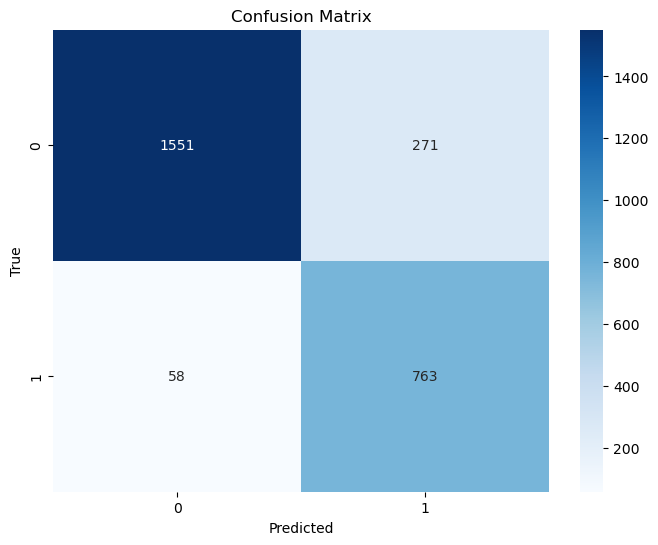

In [144]:
svm_model = SVC()

svm_model.fit(x_train, y_train)
dump(svm_model, 'svm_model.joblib')
loaded_svm_model = load('svm_model.joblib')

predictions = loaded_svm_model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
print(f"Accuracy: {accuracy:.7f}")
print(f"Precision: {precision:.7f}")
print(f"Recall: {recall:.7f}")
print(f"F1-Score: {f1:.7f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Árvore de Decisão

Accuracy: 0.9886493
Precision: 0.9886382
Recall: 0.9886493
F1-Score: 0.9886378


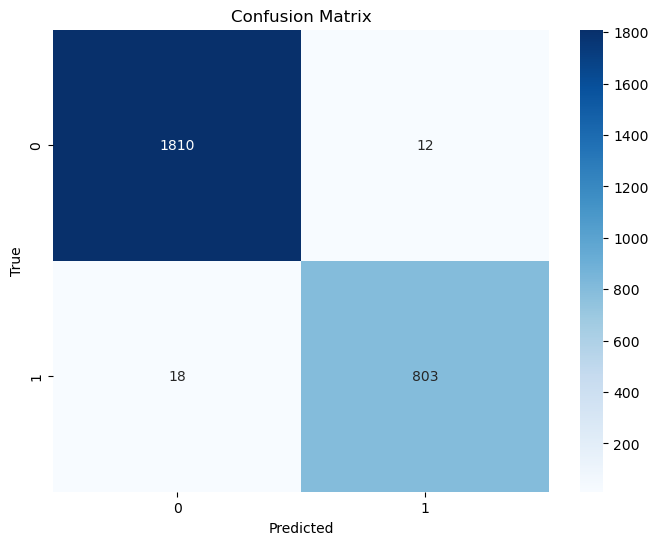

In [145]:
dt_model = DecisionTreeClassifier()

dt_model.fit(x_train, y_train)
dump(dt_model, 'decisiontree.joblib')
loaded_dt_model = load('decisiontree.joblib')

predictions = loaded_dt_model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
print(f"Accuracy: {accuracy:.7f}")
print(f"Precision: {precision:.7f}")
print(f"Recall: {recall:.7f}")
print(f"F1-Score: {f1:.7f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Sistema de recomendação de filmes

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
df = pd.read_csv(r'netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [148]:
tfidf = TfidfVectorizer(stop_words='english')

#Substituindo espaços nulos por string vazias
df['description'] = df['description'].fillna('')

#Fazendo a matriz TF-IDF ajustando e transformando os dados
tfidf_matrix = tfidf.fit_transform(df['description'])

#Shape da matriz
tfidf_matrix.shape

(8807, 18895)

In [149]:
#Importando o linear_kernel
from sklearn.metrics.pairwise import linear_kernel

#Calculando a matriz de similaridade do modelo
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [150]:
#Colocando o índice do df como sendo o título
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [151]:
#Fazendo a função do sistema de recomendação
def me_recomende(title, cosine_sim=cosine_sim):
    idx = indices[title]

    #Obtendo a pontuação de similaridade em par de todos os filmes entre eles
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Classificando os filmes com base na similaridade
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Obtendo a pontuação dos 10 filmes mais similares
    sim_scores = sim_scores[1:11]

    #Buscando os índices dos filmes (título)
    movie_indices = [i[0] for i in sim_scores]

    #Retorna o top 10 filmes mais similares ao escolhido
    return df['title'].iloc[movie_indices]

In [152]:
me_recomende('Suits')

7735                                  Philadelphia
1062                                    Law School
2623           We'll Be Right Back After The Break
8379                           The Lady in Dignity
4166                            Black Earth Rising
3080                Benchwarmers 2: Breaking Balls
4118                                   Iron Ladies
5928    Chelsea Handler: Uganda Be Kidding Me Live
1522                                     Talentime
2390                   How to Get Away with Murder
Name: title, dtype: object

In [153]:
me_recomende('Bird Box')

86                            Prey
1772                  The 12th Man
6956            Hell or High Water
5663                 Sister Cities
5                    Midnight Mass
2162                      The Rain
1795    Ajab Prem Ki Ghazab Kahani
2323                The Mirror Boy
291                    SHAMAN KING
8262       The Curse of Oak Island
Name: title, dtype: object

In [154]:
me_recomende('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

# OBRIGADO!!